In [88]:
# #################################################
# ## point_to_point ##
# #################################################
# -- Designed by
# Hamin lee
# -- Produced in June 26, 2020. (Ver.1.0)
# #################################################

In [89]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import figure, axes, pie, title, savefig
import heapq

%matplotlib inline
# scientific notation을 사용하지 않는 경우
# pd.options.display.float_format = '{:.4f}'.format

In [90]:
df1 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-01-btc-krw.csv")   # load csv
df2 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-02-btc-krw.csv")   # load csv
df3 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-03-btc-krw.csv")   # load csv
df4 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-04-btc-krw.csv")   # load csv
df5 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-05-btc-krw.csv")   # load csv
df6 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-06-btc-krw.csv")   # load csv
df7 = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018-new/2018-07-btc-krw.csv")   # load csv

In [91]:
## converting timestamp column type 'object' to 'datetime'
df1['timestamp'] = pd.to_datetime(df1['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df3['timestamp'] = pd.to_datetime(df3['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df4['timestamp'] = pd.to_datetime(df4['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df5['timestamp'] = pd.to_datetime(df5['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df6['timestamp'] = pd.to_datetime(df6['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df7['timestamp'] = pd.to_datetime(df7['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [92]:
# quantity에 부호 붙이기
for i, row in df1.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df1.at[i,'sign_quantity'] = row["quantity"]

In [93]:
# quantity에 부호 붙이기
for i, row in df2.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df2.at[i,'sign_quantity'] = row["quantity"]

In [94]:
# quantity에 부호 붙이기
for i, row in df3.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df3.at[i,'sign_quantity'] = row["quantity"]

In [95]:
# quantity에 부호 붙이기
for i, row in df4.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df4.at[i,'sign_quantity'] = row["quantity"]

In [96]:
# quantity에 부호 붙이기
for i, row in df5.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df5.at[i,'sign_quantity'] = row["quantity"]

In [97]:
# quantity에 부호 붙이기
for i, row in df6.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df6.at[i,'sign_quantity'] = row["quantity"]

In [98]:
# quantity에 부호 붙이기
for i, row in df7.iterrows(): 
    if row["side"]==0:
        row["quantity"]=-row["quantity"]
    df7.at[i,'sign_quantity'] = row["quantity"]

In [99]:
# timestamp (시간), quantity (거래 코인 양), price (코인 1개 당 가격), fee (??), amount (q * price), side (0:판 것, 1:산 것)
df1

,timestamp,quantity,price,fee,amount,side,sign_quantity
0,2018-01-03 13:44:04,0.161900,20668000,5019.000000,3341130,1,0.161900
1,2018-01-10 22:20:51,0.070594,20777000,0.000106,-1468934,0,-0.070594
2,2018-01-11 23:49:37,0.000999,19563000,0.000002,-19563,0,-0.000999
3,2018-01-18 23:09:41,0.000999,14572000,0.000002,-14572,0,-0.000999
4,2018-01-19 12:23:32,0.072600,14539000,1583.000000,1053948,1,0.072600
...,...,...,...,...,...,...,...
818,2018-01-25 21:47:46,0.001000,12849000,19.000000,12830,1,0.001000
819,2018-01-31 13:54:04,0.000999,11137000,0.000002,-11137,0,-0.000999
820,2018-01-31 13:59:03,0.001000,11105000,17.000000,11088,1,0.001000
821,2018-01-31 14:01:10,0.000999,11125000,0.000002,-11125,0,-0.000999


In [100]:
# sign_quantity 더하기 - sign_quantity_cumsum은 현재 시점 보유한 coin의 quantity
sign_quantity_cumsum1=df1["sign_quantity"].cumsum()
sign_quantity_cumsum2=df2["sign_quantity"].cumsum()
sign_quantity_cumsum3=df3["sign_quantity"].cumsum()
sign_quantity_cumsum4=df4["sign_quantity"].cumsum()
sign_quantity_cumsum5=df5["sign_quantity"].cumsum()
sign_quantity_cumsum6=df6["sign_quantity"].cumsum()
sign_quantity_cumsum7=df7["sign_quantity"].cumsum()

In [101]:
# amount 더하기 - amount_cumsum이 profit임
amount_cumsum1=df1["amount"].cumsum()
amount_cumsum2=df2["amount"].cumsum()
amount_cumsum3=df3["amount"].cumsum()
amount_cumsum4=df4["amount"].cumsum()
amount_cumsum5=df5["amount"].cumsum()
amount_cumsum6=df6["amount"].cumsum()
amount_cumsum7=df7["amount"].cumsum()

In [102]:
# float16 type으로 타입 변경
sign_quantity_cumsum1 = sign_quantity_cumsum1.astype('float16')
sign_quantity_cumsum2 = sign_quantity_cumsum2.astype('float16')
sign_quantity_cumsum3 = sign_quantity_cumsum3.astype('float16')
sign_quantity_cumsum4 = sign_quantity_cumsum4.astype('float16')
sign_quantity_cumsum5 = sign_quantity_cumsum5.astype('float16')
sign_quantity_cumsum6 = sign_quantity_cumsum6.astype('float16')
sign_quantity_cumsum7 = sign_quantity_cumsum7.astype('float16')

In [103]:
# 데이터프레임 df1, sign_quantity_cumsum, amount_cumsum 결합
cumsum_df1 = pd.concat([df1,sign_quantity_cumsum1,amount_cumsum1],axis=1)
cumsum_df2 = pd.concat([df2,sign_quantity_cumsum2,amount_cumsum2],axis=1)
cumsum_df3 = pd.concat([df3,sign_quantity_cumsum3,amount_cumsum3],axis=1)
cumsum_df4 = pd.concat([df4,sign_quantity_cumsum4,amount_cumsum4],axis=1)
cumsum_df5 = pd.concat([df5,sign_quantity_cumsum5,amount_cumsum5],axis=1)
cumsum_df6 = pd.concat([df6,sign_quantity_cumsum6,amount_cumsum6],axis=1)
cumsum_df7 = pd.concat([df7,sign_quantity_cumsum7,amount_cumsum7],axis=1)

In [104]:
# 칼럼 지정
cumsum_df1.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df2.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df3.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df4.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df5.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df6.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']
cumsum_df7.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum']

In [105]:
# 소숫점 다섯째 자리에서 자르기
cumsum_df_zero_point1=cumsum_df1[ (cumsum_df1['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df1['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point2=cumsum_df2[ (cumsum_df2['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df2['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point3=cumsum_df3[ (cumsum_df3['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df3['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point4=cumsum_df4[ (cumsum_df4['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df4['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point5=cumsum_df5[ (cumsum_df5['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df5['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point6=cumsum_df6[ (cumsum_df6['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df6['sign_quantity_cumsum(coin)'] > -0.01)]
cumsum_df_zero_point7=cumsum_df7[ (cumsum_df7['sign_quantity_cumsum(coin)'] < 0.01) & (cumsum_df7['sign_quantity_cumsum(coin)'] > -0.01)]

In [106]:
# 데이터 한 칸씩 미루기
compare1=cumsum_df_zero_point1['amount_cumsum']
compare1=compare1.shift(1)[:]     # 인덱스는 그대로 두고 데이터 한 칸씩 이동

In [107]:
compare2=cumsum_df_zero_point2['amount_cumsum']
compare2=compare2.shift(1)[:]

In [108]:
compare3=cumsum_df_zero_point3['amount_cumsum']
compare3=compare3.shift(1)[:]

In [109]:
compare4=cumsum_df_zero_point4['amount_cumsum']
compare4=compare4.shift(1)[:]

In [110]:
compare5=cumsum_df_zero_point5['amount_cumsum']
compare5=compare5.shift(1)[:]

In [111]:
compare6=cumsum_df_zero_point6['amount_cumsum']
compare6=compare6.shift(1)[:]

In [112]:
compare7=cumsum_df_zero_point7['amount_cumsum']
compare7=compare7.shift(1)[:]

In [113]:
compare1

Series([], Name: amount_cumsum, dtype: float64)

In [114]:
# 데이터 프레임 cumsum_df_zero_point()와 compare 결합
cumsum_df_zero_point1 = pd.concat([cumsum_df_zero_point1,compare1],axis=1)
cumsum_df_zero_point1 = cumsum_df_zero_point1.fillna(0)     # 결측값은 0으로 채우기

In [115]:
cumsum_df_zero_point2 = pd.concat([cumsum_df_zero_point2,compare2],axis=1)
cumsum_df_zero_point2 = cumsum_df_zero_point2.fillna(0)

In [116]:
cumsum_df_zero_point3 = pd.concat([cumsum_df_zero_point3,compare3],axis=1)
cumsum_df_zero_point3 = cumsum_df_zero_point3.fillna(0)

In [117]:
cumsum_df_zero_point4 = pd.concat([cumsum_df_zero_point4,compare4],axis=1)
cumsum_df_zero_point4 = cumsum_df_zero_point4.fillna(0)

In [118]:
cumsum_df_zero_point5 = pd.concat([cumsum_df_zero_point5,compare5],axis=1)
cumsum_df_zero_point5 = cumsum_df_zero_point5.fillna(0)

In [119]:
cumsum_df_zero_point6 = pd.concat([cumsum_df_zero_point6,compare6],axis=1)
cumsum_df_zero_point6 = cumsum_df_zero_point6.fillna(0)

In [120]:
cumsum_df_zero_point7 = pd.concat([cumsum_df_zero_point7,compare7],axis=1)
cumsum_df_zero_point7 = cumsum_df_zero_point7.fillna(0)

In [121]:
# 칼럼 지정
cumsum_df_zero_point1.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point2.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point3.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point4.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point5.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point6.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']
cumsum_df_zero_point7.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare']

In [122]:
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0
...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0


In [123]:
# 구간 별 profit 구하기 (point_amount_cumsum)
cumsum_df_zero_point1['point_amount_cumsum'] = cumsum_df_zero_point1['amount_cumsum'] - cumsum_df_zero_point1['compare']
cumsum_df_zero_point2['point_amount_cumsum'] = cumsum_df_zero_point2['amount_cumsum'] - cumsum_df_zero_point2['compare']
cumsum_df_zero_point3['point_amount_cumsum'] = cumsum_df_zero_point3['amount_cumsum'] - cumsum_df_zero_point3['compare']
cumsum_df_zero_point4['point_amount_cumsum'] = cumsum_df_zero_point4['amount_cumsum'] - cumsum_df_zero_point4['compare']
cumsum_df_zero_point5['point_amount_cumsum'] = cumsum_df_zero_point5['amount_cumsum'] - cumsum_df_zero_point5['compare']
cumsum_df_zero_point6['point_amount_cumsum'] = cumsum_df_zero_point6['amount_cumsum'] - cumsum_df_zero_point6['compare']
cumsum_df_zero_point7['point_amount_cumsum'] = cumsum_df_zero_point7['amount_cumsum'] - cumsum_df_zero_point7['compare']

In [124]:
# 결측값은 0으로 채우기
# 이거 안해도 되지 않나
cumsum_df_zero_point1=cumsum_df_zero_point1.fillna(0)
cumsum_df_zero_point2=cumsum_df_zero_point2.fillna(0)
cumsum_df_zero_point3=cumsum_df_zero_point3.fillna(0)
cumsum_df_zero_point4=cumsum_df_zero_point4.fillna(0)
cumsum_df_zero_point5=cumsum_df_zero_point5.fillna(0)
cumsum_df_zero_point6=cumsum_df_zero_point6.fillna(0)
cumsum_df_zero_point7=cumsum_df_zero_point7.fillna(0)

In [125]:
# timestamp 한 row씩 미루기
time_compare1 = cumsum_df_zero_point1['timestamp']
time_compare1 = time_compare1.shift(1)[:]     # timestamp 한 row씩 미루기

In [126]:
time_compare2 = cumsum_df_zero_point2['timestamp']
time_compare2 = time_compare2.shift(1)[:]     # timestamp 한 row씩 미루기

In [127]:
time_compare3 = cumsum_df_zero_point3['timestamp']
time_compare3 = time_compare3.shift(1)[:]     # timestamp 한 row씩 미루기

In [128]:
time_compare4 = cumsum_df_zero_point4['timestamp']
time_compare4 = time_compare4.shift(1)[:]     # timestamp 한 row씩 미루기

In [129]:
time_compare5 = cumsum_df_zero_point5['timestamp']
time_compare5 = time_compare5.shift(1)[:]     # timestamp 한 row씩 미루기

In [130]:
time_compare6 = cumsum_df_zero_point6['timestamp']
time_compare6 = time_compare6.shift(1)[:]     # timestamp 한 row씩 미루기

In [131]:
time_compare7 = cumsum_df_zero_point7['timestamp']
time_compare7 = time_compare7.shift(1)[:]     # timestamp 한 row씩 미루기

In [132]:
time_compare2

1                       NaT
3       2018-02-14 00:12:12
6       2018-02-14 00:15:41
14      2018-02-14 00:20:44
19      2018-02-14 00:28:28
                ...        
18325   2018-02-28 22:40:53
18334   2018-02-28 23:01:28
18349   2018-02-28 23:06:56
18365   2018-02-28 23:25:17
18366   2018-02-28 23:59:49
Name: timestamp, Length: 3159, dtype: datetime64[ns]

In [133]:
# 시간 간격 계산 위해 이전 타임 세팅
previous_time1 = cumsum_df_zero_point1['timestamp']
previous_time2 = cumsum_df_zero_point2['timestamp']
previous_time3 = cumsum_df_zero_point3['timestamp']
previous_time4 = cumsum_df_zero_point4['timestamp']
previous_time5 = cumsum_df_zero_point5['timestamp']
previous_time6 = cumsum_df_zero_point6['timestamp']
previous_time7 = cumsum_df_zero_point7['timestamp']

In [134]:
previous_time2

1       2018-02-14 00:12:12
3       2018-02-14 00:15:41
6       2018-02-14 00:20:44
14      2018-02-14 00:28:28
19      2018-02-14 00:33:24
                ...        
18325   2018-02-28 23:01:28
18334   2018-02-28 23:06:56
18349   2018-02-28 23:25:17
18365   2018-02-28 23:59:49
18366   2018-02-28 23:59:49
Name: timestamp, Length: 3159, dtype: datetime64[ns]

In [135]:
time_interval1 = (previous_time1 - time_compare1)
time_interval2 = (previous_time2 - time_compare2)
time_interval3 = (previous_time3 - time_compare3)
time_interval4 = (previous_time4 - time_compare4)
time_interval5 = (previous_time5 - time_compare5)
time_interval6 = (previous_time6 - time_compare6)
time_interval7 = (previous_time7 - time_compare7)

In [136]:
time_interval2

1            NaT
3       00:03:29
6       00:05:03
14      00:07:44
19      00:04:56
          ...   
18325   00:20:35
18334   00:05:28
18349   00:18:21
18365   00:34:32
18366   00:00:00
Name: timestamp, Length: 3159, dtype: timedelta64[ns]

In [137]:
# 데이터 프레임 cumsum_df_zero_point()와 time_compare 결합
cumsum_df_zero_point1 = pd.concat([cumsum_df_zero_point1,time_interval1],axis=1)
# cumsum_df_zero_point1 = cumsum_df_zero_point1.fillna(0)     # 결측값은 0으로 채우기

In [138]:
cumsum_df_zero_point2 = pd.concat([cumsum_df_zero_point2,time_interval2],axis=1)
# cumsum_df_zero_point2 = cumsum_df_zero_point2.fillna(0)     # 결측값은 0으로 채우기

In [139]:
cumsum_df_zero_point3 = pd.concat([cumsum_df_zero_point3,time_interval3],axis=1)
# cumsum_df_zero_point3 = cumsum_df_zero_point3.fillna(0)     # 결측값은 0으로 채우기

In [140]:
cumsum_df_zero_point4 = pd.concat([cumsum_df_zero_point4,time_interval4],axis=1)
# cumsum_df_zero_point4 = cumsum_df_zero_point4.fillna(0)     # 결측값은 0으로 채우기

In [141]:
cumsum_df_zero_point5 = pd.concat([cumsum_df_zero_point5,time_interval5],axis=1)
# cumsum_df_zero_point5 = cumsum_df_zero_point5.fillna(0)     # 결측값은 0으로 채우기

In [142]:
cumsum_df_zero_point6 = pd.concat([cumsum_df_zero_point6,time_interval6],axis=1)
# cumsum_df_zero_point6 = cumsum_df_zero_point6.fillna(0)     # 결측값은 0으로 채우기

In [143]:
cumsum_df_zero_point7 = pd.concat([cumsum_df_zero_point7,time_interval7],axis=1)
# cumsum_df_zero_point7 = cumsum_df_zero_point7.fillna(0)     # 결측값은 0으로 채우기

In [144]:
# 칼럼 지정
cumsum_df_zero_point1.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']
cumsum_df_zero_point2.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']
cumsum_df_zero_point3.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']
cumsum_df_zero_point4.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']
cumsum_df_zero_point5.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']
cumsum_df_zero_point6.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']
cumsum_df_zero_point7.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval']

In [145]:
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum,time_interval
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0,-5593.0,NaT
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0,1155.0,00:03:29
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0,33302.0,00:05:03
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0,-28345.0,00:07:44
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0,-17011.0,00:04:56
...,...,...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0,-33984.0,00:20:35
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0,681.0,00:05:28
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0,82345.0,00:18:21
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0,-22352.0,00:34:32


In [146]:
# time_interval - point_amount_cumsum 추출하기
# t_inter_p_cumsum1 = cumsum_df_zero_point1.ilic[:, [11, 10]]     # 1월은 데이터가 안 나와서 제외
t_inter_p_cumsum2 = cumsum_df_zero_point2.iloc[:, [11, 10]]
t_inter_p_cumsum3 = cumsum_df_zero_point3.iloc[:, [11, 10]]
t_inter_p_cumsum4 = cumsum_df_zero_point4.iloc[:, [11, 10]]
t_inter_p_cumsum5 = cumsum_df_zero_point5.iloc[:, [11, 10]]
t_inter_p_cumsum6 = cumsum_df_zero_point6.iloc[:, [11, 10]]
t_inter_p_cumsum7 = cumsum_df_zero_point7.iloc[:, [11, 10]]

In [147]:
t_inter_p_cumsum3.head(10)

,time_interval,point_amount_cumsum
8,NaT,10680.0
11,00:10:43,11414.0
14,00:04:49,-133.0
18,00:12:35,6159.0
20,00:00:56,-42.0
44,00:15:59,-21655.0
47,00:03:13,3938.0
57,00:17:30,-11323.0
64,00:06:06,-4828.0
68,00:05:43,39565.0


In [148]:
# 처음에 NaT 있는것 제외
t_inter_p_cumsum2 = t_inter_p_cumsum2.iloc[1:]
t_inter_p_cumsum3 = t_inter_p_cumsum3.iloc[1:]
t_inter_p_cumsum4 = t_inter_p_cumsum4.iloc[1:]
t_inter_p_cumsum5 = t_inter_p_cumsum5.iloc[1:]
t_inter_p_cumsum6 = t_inter_p_cumsum6.iloc[1:]
t_inter_p_cumsum7 = t_inter_p_cumsum7.iloc[1:]

In [149]:
t_inter_p_cumsum3

,time_interval,point_amount_cumsum
11,00:10:43,11414.0
14,00:04:49,-133.0
18,00:12:35,6159.0
20,00:00:56,-42.0
44,00:15:59,-21655.0
...,...,...
5531,00:11:30,2201.0
5534,00:14:01,-1914.0
5535,00:05:10,-106973.0
5536,00:03:26,106845.0


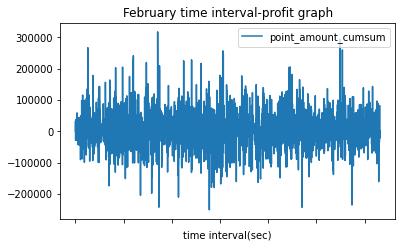

In [150]:
# 2월 time-interval - profig graph
t_inter_p_cumsum2_graph = t_inter_p_cumsum2.plot(title='February time interval-profit graph', x='time_interval', y='point_amount_cumsum')
t_inter_p_cumsum2_graph.set_xlabel('time interval(sec)')
# t_inter_p_cumsum2_graph.set_ylable('profit(KRW)')
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/time interval - profit/time_interval_profit_graph_Feb.png', dpi=300)

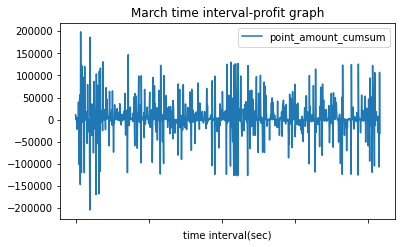

In [151]:
# 3월 time-interval - profig graph
t_inter_p_cumsum3_graph = t_inter_p_cumsum3.plot(title='March time interval-profit graph', x='time_interval', y='point_amount_cumsum')
t_inter_p_cumsum3_graph.set_xlabel('time interval(sec)')
# t_inter_p_cumsum3_graph.set_ylable('profit(KRW)')
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/time interval - profit/time_interval_profit_graph_Mar.png', dpi=300)

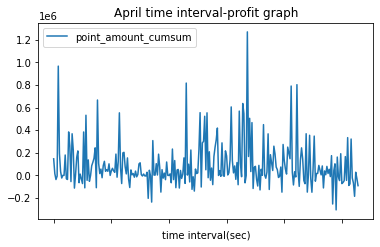

In [152]:
# 4월 time-interval - profig graph
t_inter_p_cumsum4_graph = t_inter_p_cumsum4.plot(title='April time interval-profit graph', x='time_interval', y='point_amount_cumsum')
t_inter_p_cumsum4_graph.set_xlabel('time interval(sec)')
# t_inter_p_cumsum4_graph.set_ylable('profit(KRW)')
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/time interval - profit/time_interval_profit_graph_Apr.png', dpi=300)

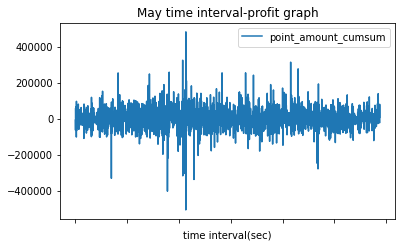

In [153]:
# 5월 time-interval - profig graph
t_inter_p_cumsum5_graph = t_inter_p_cumsum5.plot(title='May time interval-profit graph', x='time_interval', y='point_amount_cumsum')
t_inter_p_cumsum5_graph.set_xlabel('time interval(sec)')
# t_inter_p_cumsum5_graph.set_ylable('profit(KRW)')
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/time interval - profit/time_interval_profit_graph_May.png', dpi=300)

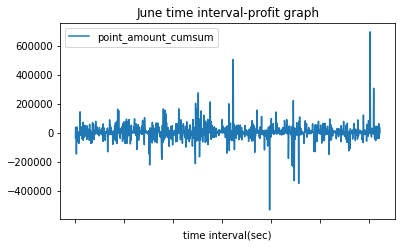

In [154]:
# 6월 time-interval - profig graph
t_inter_p_cumsum6_graph = t_inter_p_cumsum6.plot(title='June time interval-profit graph', x='time_interval', y='point_amount_cumsum')
t_inter_p_cumsum6_graph.set_xlabel('time interval(sec)')
# t_inter_p_cumsum6_graph.set_ylable('profit(KRW)')
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/time interval - profit/time_interval_profit_graph_Jun.png', dpi=300)

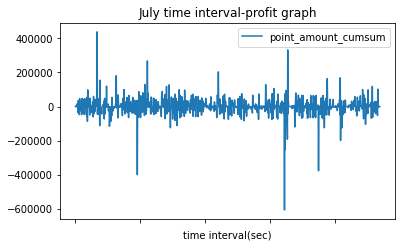

In [155]:
# 7월 time-interval - profig graph
t_inter_p_cumsum7_graph = t_inter_p_cumsum7.plot(title='July time interval-profit graph', x='time_interval', y='point_amount_cumsum')
t_inter_p_cumsum7_graph.set_xlabel('time interval(sec)')
# t_inter_p_cumsum7_graph.set_ylable('profit(KRW)')
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/time interval - profit/time_interval_profit_graph_Jul.png', dpi=300)

In [156]:
# 2월의 time interval 칼럼
cumsum_df_zero_point2['time_interval']

1            NaT
3       00:03:29
6       00:05:03
14      00:07:44
19      00:04:56
          ...   
18325   00:20:35
18334   00:05:28
18349   00:18:21
18365   00:34:32
18366   00:00:00
Name: time_interval, Length: 3159, dtype: timedelta64[ns]

In [157]:
# 마지막 00:00:00 없애기
cumsum_df_zero_point2['time_interval'].iloc[1:3158]

3       00:03:29
6       00:05:03
14      00:07:44
19      00:04:56
28      00:20:53
          ...   
18309   00:01:00
18325   00:20:35
18334   00:05:28
18349   00:18:21
18365   00:34:32
Name: time_interval, Length: 3157, dtype: timedelta64[ns]

In [158]:
# 2월 time interval 평균
cumsum_df_zero_point2['time_interval'].mean()

Timedelta('0 days 00:06:50.151044')

In [159]:
# 2월 time interval 최댓값
cumsum_df_zero_point2['time_interval'].max()

Timedelta('0 days 03:34:21')

In [160]:
# 2월 time interval 최솟값
# 마지막 00:00:00 없애기
cumsum_df_zero_point2['time_interval'].iloc[1:3158].min()

Timedelta('0 days 00:00:00')

In [161]:
cumsum_df_zero_point2['time_interval'].nsmallest(2).iloc[[-1]]

1763   0 days
Name: time_interval, dtype: timedelta64[ns]

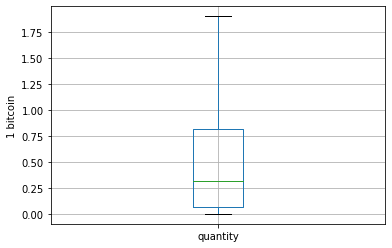

In [162]:
# 시험삼아 해 본 quantity box-plot
# 여러 달꺼 합쳐서 해볼 것.
boxplot = cumsum_df_zero_point2.boxplot(column=['quantity'])
# boxplot(title='February quantity')
boxplot.set_ylabel('1 bitcoin')
# plt.show()
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/boxplot/feb_qunantity.png',dpi=300)

In [163]:
# timedelta를 float64로
timediff = cumsum_df_zero_point2['time_interval'].dt.seconds

timediff

1           NaN
3         209.0
6         303.0
14        464.0
19        296.0
          ...  
18325    1235.0
18334     328.0
18349    1101.0
18365    2072.0
18366       0.0
Name: time_interval, Length: 3159, dtype: float64

In [164]:
# timediff dataframe에 이어 붙이기
cumsum_df_zero_point2 = pd.concat([cumsum_df_zero_point2,timediff],axis=1)
# cumsum_df_zero_point2 = cumsum_df_zero_point2.fillna(0)     # 결측값은 0으로 채우기

In [165]:
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum,time_interval,time_interval
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0,-5593.0,NaT,NaN
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0,1155.0,00:03:29,209.0
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0,33302.0,00:05:03,303.0
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0,-28345.0,00:07:44,464.0
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0,-17011.0,00:04:56,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0,-33984.0,00:20:35,1235.0
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0,681.0,00:05:28,328.0
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0,82345.0,00:18:21,1101.0
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0,-22352.0,00:34:32,2072.0


In [166]:
# 칼럼 지정
cumsum_df_zero_point2.columns = ['timestamp', 'quantity', 'price', 'fee', 'amount', 'side', 'sign_quantity', 'sign_quantity_cumsum(coin)', 'amount_cumsum', 'compare', 'point_amount_cumsum', 'time_interval', 'timediff']

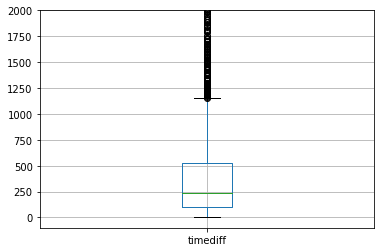

In [167]:
# 시험삼아 해 본 time diff box plot
# 범위 -100 ~ 2000
# 점들은 왜...
boxplot = cumsum_df_zero_point2.boxplot(column=['timediff'])
boxplot.set_ylim([-100,2000])
plt.show()

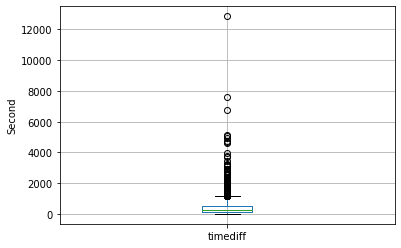

In [168]:
# 시험삼아 해 본 time diff box plot
boxplot = cumsum_df_zero_point2.boxplot(column=['timediff'])
boxplot.set_ylabel('Second')
# plt.show()
plt.savefig('/Users/hamin/bithumb_bot/hamin_code/graph/boxplot/feb_time_interval.png',dpi=300)
plt.show()

In [76]:
cumsum_df_zero_point2

,timestamp,quantity,price,fee,amount,side,sign_quantity,sign_quantity_cumsum(coin),amount_cumsum,compare,point_amount_cumsum,time_interval,timediff
1,2018-02-14 00:12:12,0.7990,9854000,0.0,7873346,1,0.7990,0.000000,-5593,0.0,-5593.0,NaT,NaN
3,2018-02-14 00:15:41,0.1050,9860000,0.0,1035300,1,0.1050,0.000000,-4438,-5593.0,1155.0,00:03:29,209.0
6,2018-02-14 00:20:44,0.3015,9882000,0.0,2979423,1,0.3015,-0.000000,28864,-4438.0,33302.0,00:05:03,303.0
14,2018-02-14 00:28:28,0.2978,9825000,0.0,2925885,1,0.2978,-0.000000,519,28864.0,-28345.0,00:07:44,464.0
19,2018-02-14 00:33:24,0.4805,9804000,0.0,4710822,1,0.4805,-0.000000,-16492,519.0,-17011.0,00:04:56,296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18325,2018-02-28 23:01:28,1.2093,11837000,0.0,14314484,1,1.2093,-0.000066,19994386,20028370.0,-33984.0,00:20:35,1235.0
18334,2018-02-28 23:06:56,0.0154,11838000,0.0,182305,1,0.0154,-0.000066,19995067,19994386.0,681.0,00:05:28,328.0
18349,2018-02-28 23:25:17,0.2085,11884000,0.0,2477814,1,0.2085,-0.000056,20077412,19995067.0,82345.0,00:18:21,1101.0
18365,2018-02-28 23:59:49,0.5662,11923000,0.0,6750803,1,0.5662,-0.000280,20055060,20077412.0,-22352.0,00:34:32,2072.0


In [92]:
timediff2 = cumsum_df_zero_point2['timediff']

KeyError: 'timediff'

In [79]:
# 인덱스 값 뽑아보기
cumsum_df_zero_point2.index

Int64Index([    1,     3,     6,    14,    19,    28,    30,    35,    50,
               52,
            ...
            18286, 18299, 18305, 18307, 18309, 18325, 18334, 18349, 18365,
            18366],
           dtype='int64', length=3159)

In [82]:
# 인덱스 비교 열 데이터 한 칸씩 미루기
index_compare2=cumsum_df_zero_point2.index

# int64Index를 float64로
index_compare2=index_compare2.shift(1)[:]     # 인덱스는 그대로 두고 데이터 한 칸씩 이동

NotImplementedError: Not supported for type Int64Index

In [81]:
index_compare2

1               NaN
3               NaN
6           -5593.0
14          -4438.0
19          28864.0
            ...    
18325    20027787.0
18334    20028370.0
18349    19994386.0
18365    19995067.0
18366    20077412.0
Name: amount_cumsum, Length: 3159, dtype: float64

In [ ]:
# 데이터 프레임 cumsum_df_zero_point()와 compare 결합
cumsum_df_zero_point2 = pd.concat([cumsum_df_zero_point1,compare1],axis=1)
cumsum_df_zero_point1 = cumsum_df_zero_point1.fillna(0)     # 결측값은 0으로 채우기